In [15]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Exploring plotting ROC curves

hmmmm, I can't figure out how to get the RocCurveDisplay plots to include more than one line

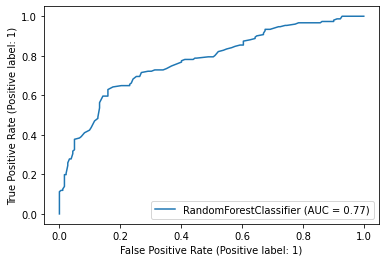

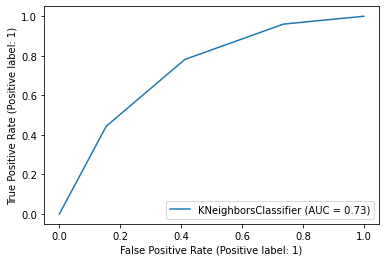

In [46]:
RocCurveDisplay.from_estimator(best_model_rfc, X_test.values, y_test)
RocCurveDisplay.from_estimator(best_model_knn, X_test.values, y_test)

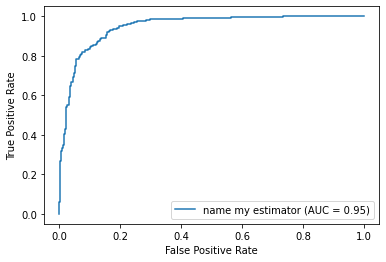

In [58]:
y_test_score = best_model.predict_proba(X_test.values)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_score)
roc_auc_val = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_val,
                                  estimator_name='name my estimator')

display.plot()
plt.show()

## Putting all three models into one plot

In [77]:
# coupon_type = 'Restaurant20To50'
# coupon_type = 'CarryAway'
# coupon_type = 'RestaurantLessThan20'
coupon_type = 'CoffeeHouse'
# coupon_type = 'Bar'

with open(f'model/phase2/{coupon_type}_best_model_RFC.pickle', "rb") as f: 
    best_model_rfc = pickle.load(f)

with open(f'model/phase2/{coupon_type}_best_model_KNN.pickle', "rb") as f: 
    best_model_knn = pickle.load(f)

with open(f'model/phase2/{coupon_type}_best_model_LogisticRegression.pickle', "rb") as f: 
    best_model_lr = pickle.load(f)

X_test = pd.read_csv(f'data/{coupon_type}_X_test_phase2.csv')
y_test = pd.read_csv(f'data/{coupon_type}_y_test_phase2.csv')

y_test_score_rfc = best_model_rfc.predict_proba(X_test.values)[:, 1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_test_score_rfc)
roc_auc_val_rfc = auc(fpr_rfc, tpr_rfc)

y_test_score_knn = best_model_knn.predict_proba(X_test.values)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_score_knn)
roc_auc_val_knn = auc(fpr_knn, tpr_knn)

y_test_score_lr = best_model_lr.predict_proba(X_test.values)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_score_lr)
roc_auc_val_lr = auc(fpr_lr, tpr_lr)

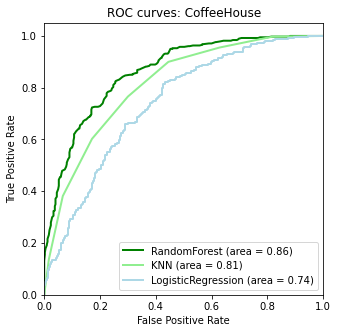

In [78]:
## plot all 3 models in one
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(fpr_rfc, tpr_rfc, color="green", lw=2, label="RandomForest (area = %0.2f)" % roc_auc_val_rfc)
plt.plot(fpr_knn, tpr_knn, color="lightgreen", lw=2, label="KNN (area = %0.2f)" % roc_auc_val_knn)
plt.plot(fpr_lr, tpr_lr, color="lightblue", lw=2, label="LogisticRegression (area = %0.2f)" % roc_auc_val_lr)

# plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC curves: {coupon_type}")
plt.legend(loc="lower right")
plt.savefig(f'plots/ROC_curves_3_models_{coupon_type}.png', bbox_inches='tight')
plt.show()

# Probability distribution

Create separate histograms for accept and reject (ie split on true label)?

...ran out of time, I never really got around to looking into this

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

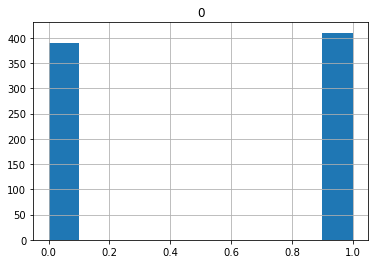

In [65]:
y_test_score = best_model_rfc.estimators_[10].predict_proba(X_test.values)[:, 1]
pd.DataFrame(y_test_score).hist()

In [68]:
df = pd.DataFrame()
df['accept_Y'] = y_test
df['proba_accept'] = best_model_rfc.predict_proba(X_test.values)[:, 1]


array([[<AxesSubplot:title={'center':'accept_Y'}>,
        <AxesSubplot:title={'center':'proba_accept'}>]], dtype=object)

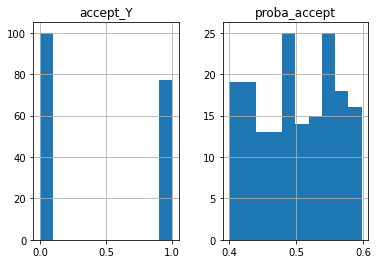

In [70]:
df.loc[(df.proba_accept >= 0.4) & (df.proba_accept <= 0.6), ['accept_Y', 'proba_accept']].hist()